In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
# Load dataset into a DataFrame
df = pd.read_csv('NIH.csv')

In [3]:
# Set display format for float values
pd.options.display.float_format = '{:.0f}'.format

In [4]:
# Convert Award Notice Date to datetime
df['Award Notice Date'] = pd.to_datetime(df['Award Notice Date'], errors='coerce')

In [5]:
print(df.dtypes)

NIH Spending Categorization              object
Project Terms                            object
Project Title                            object
Public Health Relevance                  object
Administering IC                         object
Application ID                            int64
Award Notice Date                datetime64[ns]
Opportunity Number                       object
Project Number                           object
Type                                     object
Activity                                 object
IC                                       object
Serial Number                            object
Support Year                             object
Suffix                                   object
Program Official Information             object
Project Start Date                       object
Project End Date                         object
Study Section                            object
Subproject Number                        object
Contact PI Person ID                    

In [6]:
import numpy as np

# Replace blank or whitespace strings with NaN
df[['Direct Cost IC', 'InDirect Cost IC']] = df[['Direct Cost IC', 'InDirect Cost IC']].replace(r'^\s*$', np.nan, regex=True)

# Convert 'Direct Cost IC' and 'InDirect Cost IC' columns to float
df[['Direct Cost IC', 'InDirect Cost IC']] = df[['Direct Cost IC', 'InDirect Cost IC']].astype(float)

# Convert 'Direct Cost IC' and 'InDirect Cost IC' columns to Int64 (nullable integer type)
df[['Direct Cost IC', 'InDirect Cost IC']] = df[['Direct Cost IC', 'InDirect Cost IC']].astype(pd.Int64Dtype())

print(df)

                           NIH Spending Categorization  \
0                            No NIH Category available   
1                            No NIH Category available   
2                            No NIH Category available   
3    Brain Disorders; Epilepsy; Neurodegenerative; ...   
4                            No NIH Category available   
..                                                 ...   
284  Brain Disorders; Clinical Research; Epilepsy; ...   
285  Brain Disorders; Epilepsy; Genetics; Neurodege...   
286  Biotechnology; Brain Disorders; Epilepsy; Gene...   
287  Behavioral and Social Science; Biotechnology; ...   
288  Brain Disorders; Epilepsy; Genetics; Human Gen...   

                                         Project Terms  \
0    Acute;Administrative Supplement;Animal Model;A...   
1    Acute;Animal Model;Animals;Apnea;Arousal;Biolo...   
2    Action Potentials;Affect;Age;Age Months;Axon;C...   
3    Acute;Administrative Supplement;Animal Model;A...   
4    5&apos;-

Index(['Fiscal Year', 'Total Cost', 'Award Year', 'Award Month',
       'Administering IC_NHLBI', 'Administering IC_NIA',
       'Administering IC_NICHD', 'Administering IC_NIDA',
       'Administering IC_NIDCD', 'Administering IC_NIGMS',
       ...
       'Funding Mechanism_SBIR/STTR', 'Funding Mechanism_Training, Individual',
       'Funding IC(s)_NHLBI', 'Funding IC(s)_NIA', 'Funding IC(s)_NICHD',
       'Funding IC(s)_NIDA', 'Funding IC(s)_NIDCD', 'Funding IC(s)_NIGMS',
       'Funding IC(s)_NIMH', 'Funding IC(s)_NINDS'],
      dtype='object', length=369)
Index(['Fiscal_Year', 'Total_Cost', 'Award_Year', 'Award_Month',
       'Administering_IC_NHLBI', 'Administering_IC_NIA',
       'Administering_IC_NICHD', 'Administering_IC_NIDA',
       'Administering_IC_NIDCD', 'Administering_IC_NIGMS',
       ...
       'Funding_Mechanism_SBIR/STTR', 'Funding_Mechanism_Training,_Individual',
       'Funding_IC(s)_NHLBI', 'Funding_IC(s)_NIA', 'Funding_IC(s)_NICHD',
       'Funding_IC(s)_NIDA', '

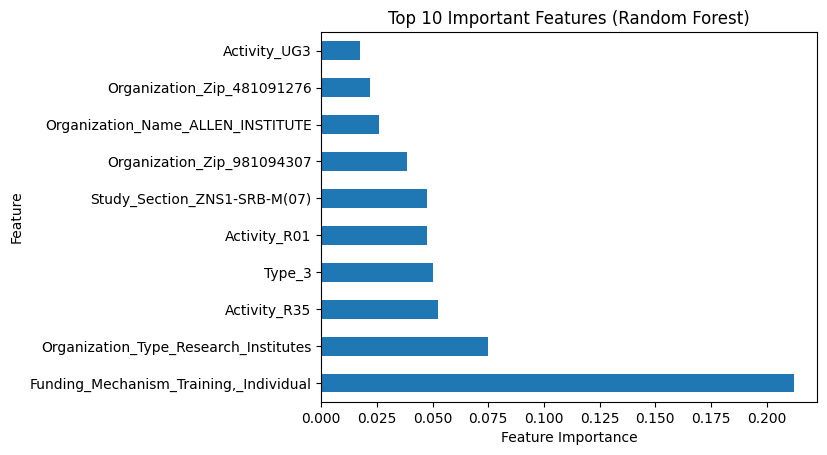

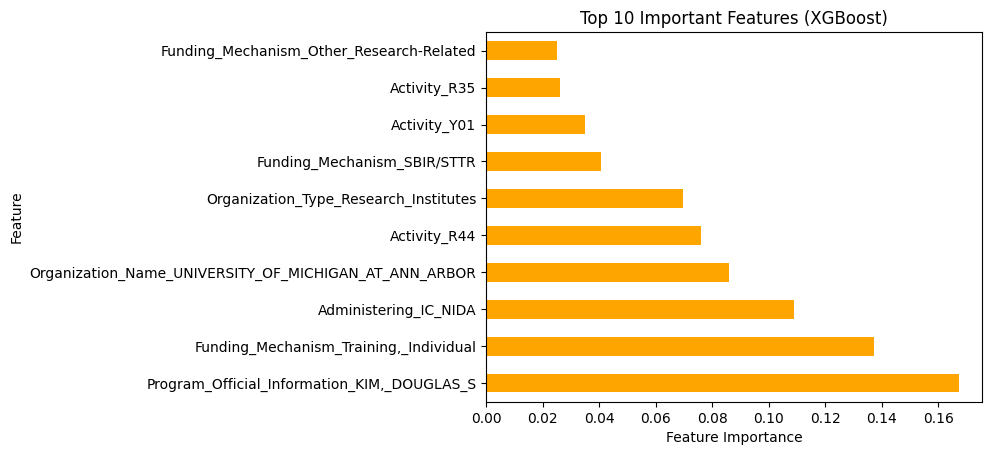

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming 'df' is your DataFrame and 'Award Notice Date' is already in datetime format

# Extract month and year from Award Notice Date
df['Award Year'] = df['Award Notice Date'].dt.year
df['Award Month'] = df['Award Notice Date'].dt.month

# Drop irrelevant columns for modeling
df.drop(['NIH Spending Categorization', 'Project Terms', 'Project Title', 'Public Health Relevance', 'Award Notice Date',
          'Opportunity Number', 'Project Number', 'Total Cost IC', 'Application ID', 'Serial Number', 'Suffix','DUNS Number', 
          'Subproject Number', 'Contact PI Person ID', 'Contact PI / Project Leader', 'Other PI or Project Leader(s)', 'Project Abstract', 
          'Budget Start Date', 'Budget End Date', 'Project Start Date', 'Project End Date', 'Organization ID (IPF)', 
          'CFDA Code', 'Latitude', 'Longitude', 'ARRA Indicator', 'Organization Country', 'UEI', 'Primary DUNS', 'Primary UEI', 
          'DUNS Number', 'FIPS', 'Direct Cost IC', 'InDirect Cost IC'], axis=1, inplace=True)

# Handle missing values (example: fill with 0 or drop)
df.fillna(0, inplace=True)  # Alternatively, you can use df.dropna()

# Convert categorical variables to numeric (example: one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Print columns to check for any issues
print(df.columns)

# Sanitize column names
df.columns = df.columns.str.replace('[', '_', regex=True).str.replace(']', '_', regex=True).str.replace('<', '_', regex=True).str.replace('>', '_', regex=True).str.replace(' ', '_', regex=False)

# Verify column names after sanitization
print(df.columns)

# Split data into features (X) and target (y)
X = df.drop('Total_Cost', axis=1)
y = df['Total_Cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

print("Linear Regression Model:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Model:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model:")
evaluate_model(xgb_model, X_test, y_test)

# Visualize feature importance for Random Forest model
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_rf.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Visualize feature importance for XGBoost model
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance_xgb.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top 10 Important Features (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()




In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Award Notice Date' is already in datetime format

# Extract month and year from Award Notice Date
df['Award Year'] = df['Award Notice Date'].dt.year
df['Award Month'] = df['Award Notice Date'].dt.month

# Drop irrelevant columns for modeling
df.drop(['NIH Spending Categorization', 'Project Terms', 'Project Title', 'Public Health Relevance', 'Award Notice Date',
          'Opportunity Number', 'Project Number', 'Total Cost IC', 'Application ID', 'Serial Number', 'Suffix','DUNS Number', 
          'Subproject Number', 'Contact PI Person ID', 'Contact PI / Project Leader', 'Other PI or Project Leader(s)', 'Project Abstract', 
          'Budget Start Date', 'Budget End Date', 'Project Start Date', 'Project End Date', 'Organization ID (IPF)', 
          'CFDA Code', 'Latitude', 'Longitude', 'ARRA Indicator', 'Organization Country', 'UEI', 'Primary DUNS', 'Primary UEI', 
          'DUNS Number', 'FIPS', 'Direct Cost IC', 'InDirect Cost IC'], axis=1, inplace=True)

# Handle missing values (example: fill with 0 or drop)
df.fillna(0, inplace=True)  # Alternatively, you can use df.dropna()

# Convert categorical variables to numeric (example: one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Split data into features (X) and target (y)
X = df.drop('Total Cost', axis=1)
y = df['Total Cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

print("Linear Regression Model:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Model:")
evaluate_model(rf_model, X_test, y_test)

# Visualize feature importance for Random Forest model
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


KeyError: 'Award Notice Date'

In [ ]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and print results
def cross_validate_model(model, X, y):
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Convert negative mean squared errors to positive
    mse_scores = -scores
    
    # Print cross-validation results
    print("Cross-Validation Mean Squared Error:", mse_scores.mean())
    print("Cross-Validation R-squared:", r2_scores.mean())

# Cross-validate Linear Regression model
print("\nLinear Regression Model (Cross-Validated):")
cross_validate_model(lr_model, X, y)

# Cross-validate Random Forest model
print("\nRandom Forest Model (Cross-Validated):")
cross_validate_model(rf_model, X, y)



Linear Regression Model (Cross-Validated):
Cross-Validation Mean Squared Error: 9059871544559.121
Cross-Validation R-squared: -235.35556303532684

Random Forest Model (Cross-Validated):
Cross-Validation Mean Squared Error: 18463056966.397236
Cross-Validation R-squared: 0.6828602073773586


In [8]:
##New cross-validation
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and print results
def cross_validate_model(model, X, y):
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Convert negative mean squared errors to positive
    mse_scores = -scores
    
    # Print cross-validation results
    print("Cross-Validation Mean Squared Error:", mse_scores.mean())
    print("Cross-Validation R-squared:", r2_scores.mean())

# Cross-validate Linear Regression model
print("\nLinear Regression Model (Cross-Validated):")
cross_validate_model(lr_model, X, y)

# Cross-validate Random Forest model
print("\nRandom Forest Model (Cross-Validated):")
cross_validate_model(rf_model, X, y)

# Cross-validate XGBoost model
print("\nXGBoost Model (Cross-Validated):")
cross_validate_model(xgb_model, X, y)



Linear Regression Model (Cross-Validated):
Cross-Validation Mean Squared Error: 9059871544559.121
Cross-Validation R-squared: -235.35556303532684

Random Forest Model (Cross-Validated):
Cross-Validation Mean Squared Error: 18463056966.397236
Cross-Validation R-squared: 0.6828602073773586

XGBoost Model (Cross-Validated):
Cross-Validation Mean Squared Error: 17436890691.372173
Cross-Validation R-squared: 0.6821930345846944


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Award Notice Date' is already in datetime format

# Extract month and year from Award Notice Date
df['Award Year'] = df['Award Notice Date'].dt.year
df['Award Month'] = df['Award Notice Date'].dt.month

# Drop irrelevant columns for modeling
irrelevant_columns = [
    'NIH Spending Categorization', 'Project Terms', 'Project Title', 'Public Health Relevance', 
    'Award Notice Date', 'Opportunity Number', 'Project Number', 'Total Cost IC', 'Application ID', 
    'Serial Number', 'Suffix', 'DUNS Number', 'Subproject Number', 'Contact PI Person ID', 
    'Contact PI / Project Leader', 'Other PI or Project Leader(s)', 'Project Abstract', 'Budget Start Date', 
    'Budget End Date', 'Project Start Date', 'Project End Date', 'Organization ID (IPF)', 'CFDA Code', 
    'Latitude', 'Longitude', 'ARRA Indicator', 'Organization Country', 'UEI', 'Primary DUNS', 'Primary UEI', 
    'DUNS Number', 'FIPS', 'Direct Cost IC', 'InDirect Cost IC'
]
df.drop(irrelevant_columns, axis=1, inplace=True)

# Handle missing values (example: fill with 0 or drop)
df.fillna(0, inplace=True)  # Alternatively, you can use df.dropna()

# Convert categorical variables to numeric (example: one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Replace invalid characters in column names for XGBoost compatibility
df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_').str.replace('>', '_').str.replace(' ', '_')

# Split data into features (X) and target (y)
X = df.drop('Total_Cost', axis=1)
y = df['Total_Cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

print("Linear Regression Model:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Model:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model:")
evaluate_model(xgb_model, X_test, y_test)

# Define a function to perform cross-validation and print results
def cross_validate_model(model, X, y):
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Convert negative mean squared errors to positive
    mse_scores = -scores
    
    # Print cross-validation results
    print("Cross-Validation Mean Squared Error:", mse_scores.mean())
    print("Cross-Validation R-squared:", r2_scores.mean())

# Cross-validate Linear Regression model
print("\nLinear Regression Model (Cross-Validated):")
cross_validate_model(lr_model, X, y)

# Cross-validate Random Forest model
print("\nRandom Forest Model (Cross-Validated):")
cross_validate_model(rf_model, X, y)

# Cross-validate XGBoost model
print("\nXGBoost Model (Cross-Validated):")
cross_validate_model(xgb_model, X, y)

# Visualize feature importance for XGBoost model
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


KeyError: 'Award Notice Date'

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'alpha': [0, 0.1, 1],
    'lambda': [1, 1.5, 2]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated R-squared: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
evaluate_model(best_xgb_model, X_test, y_test)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'alpha': 0, 'colsample_bytree': 1.0, 'lambda': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validated R-squared:  0.7196551979363871
Mean Squared Error: 225829825.30391482
R-squared: 0.9950311279021432


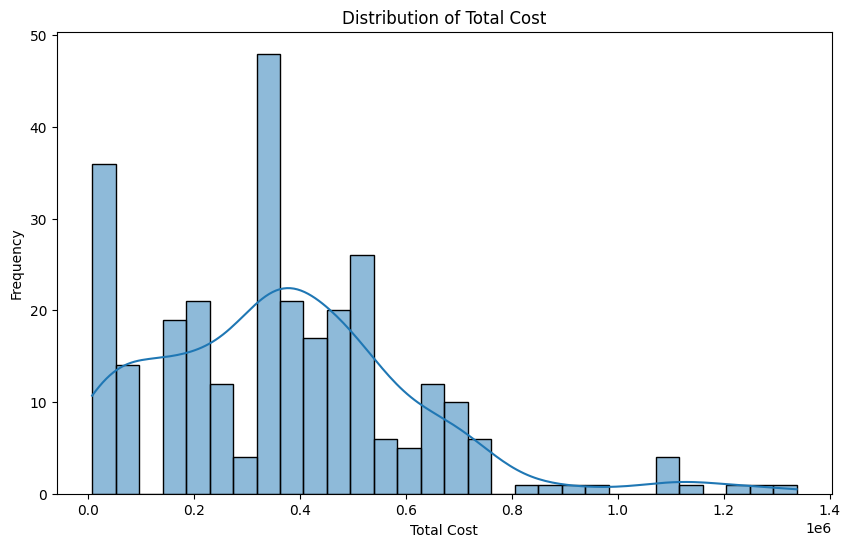

In [9]:
import seaborn as sns

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Cost'], bins=30, kde=True)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

# Cross-validate the tuned model
print("\nRandom Forest Model (Tuned and Cross-Validated):")
cross_validate_model(best_rf_model, X, y)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

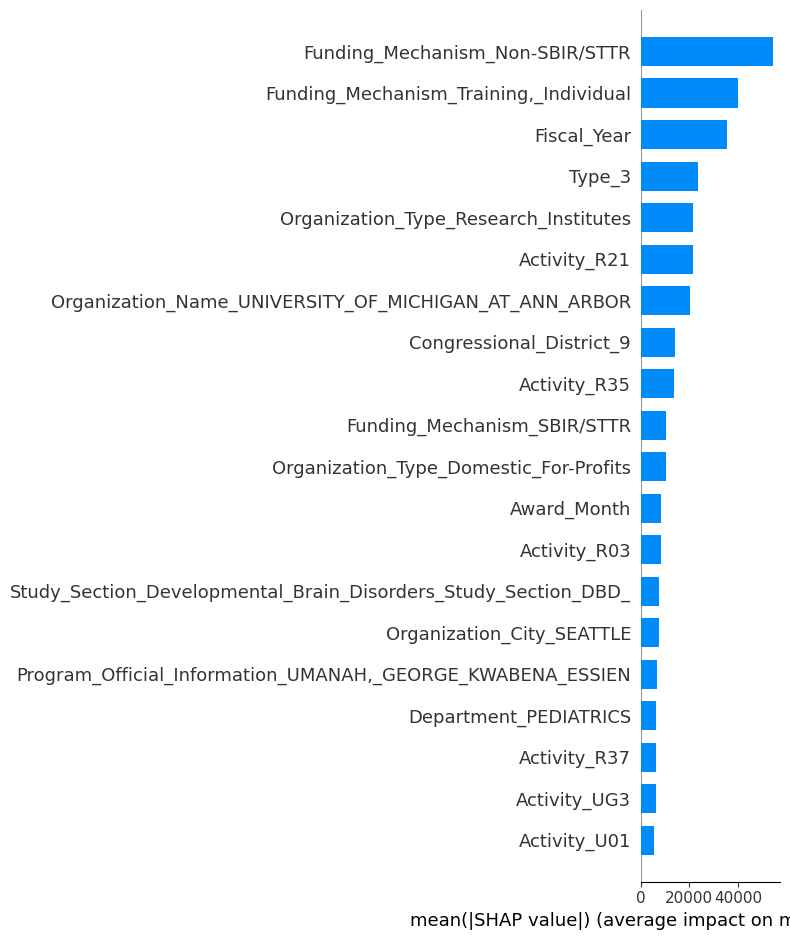

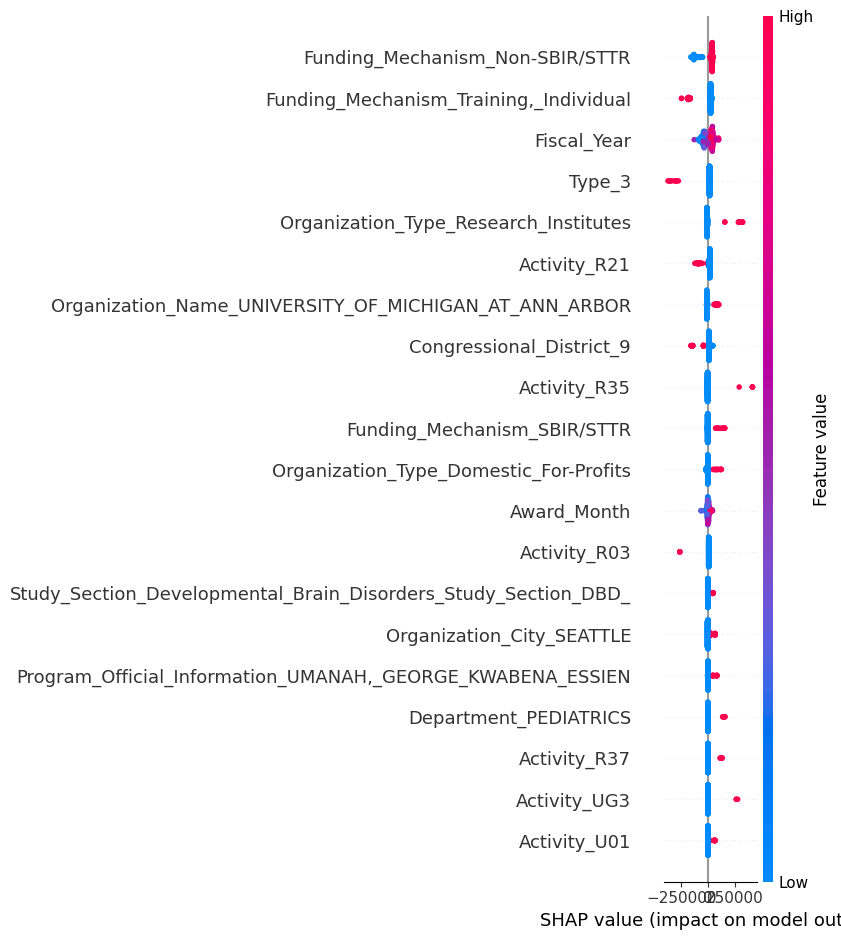

In [12]:
import shap

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X)

# Visualize the SHAP values
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)


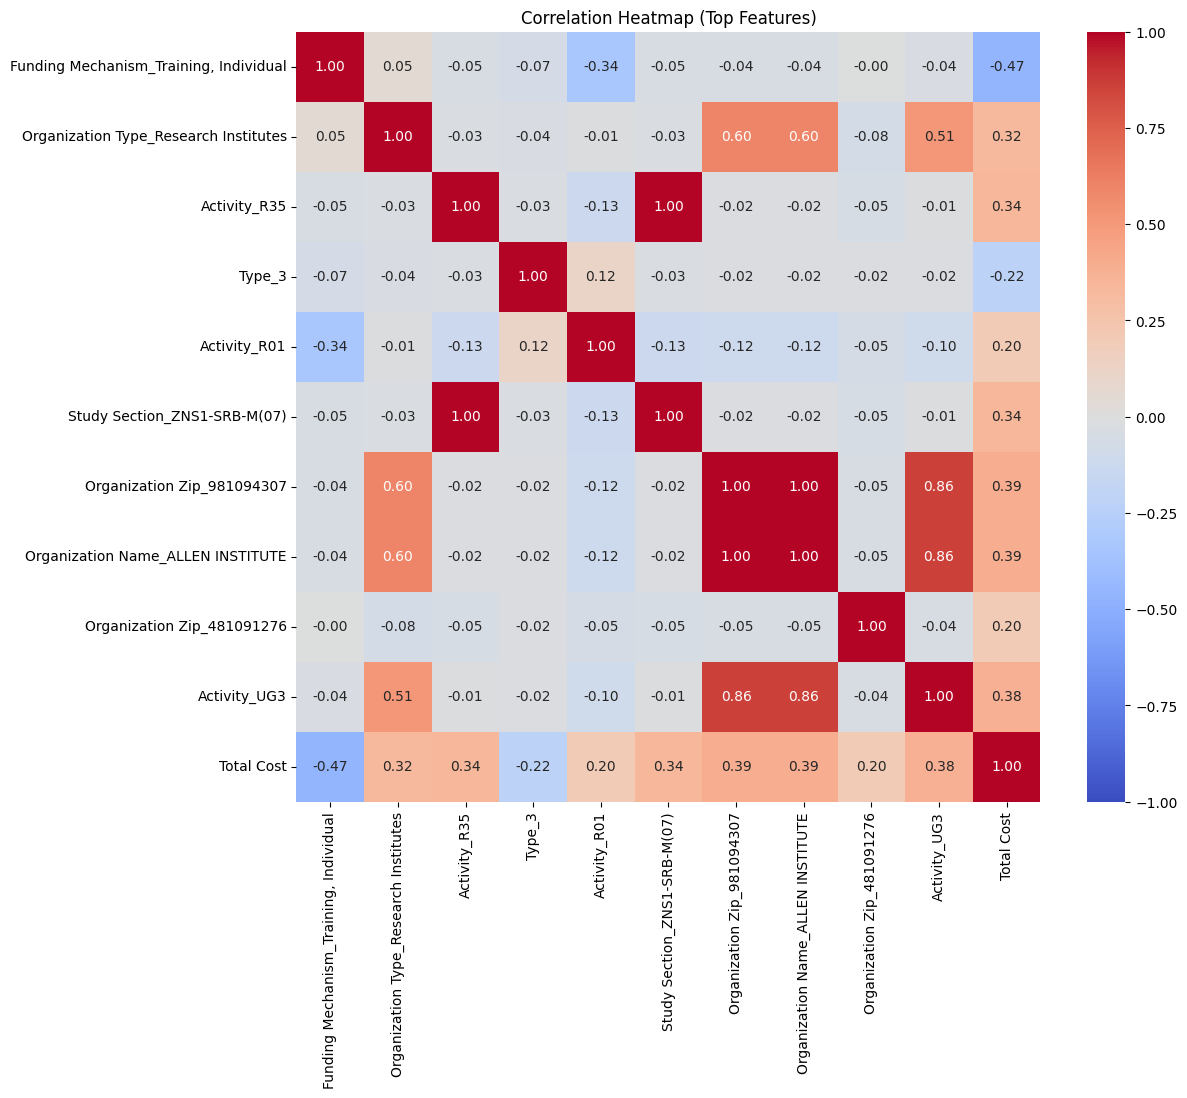

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume the DataFrame 'df' and the list of top features 'top_features' are already defined

# Define top features from the Random Forest importance
top_features = [
    'Funding Mechanism_Training, Individual',
    'Organization Type_Research Institutes',
    'Activity_R35',
    'Type_3',
    'Activity_R01',
    'Study Section_ZNS1-SRB-M(07)',
    'Organization Zip_981094307',
    'Organization Name_ALLEN INSTITUTE',
    'Organization Zip_481091276',
    'Activity_UG3'
]

# Subset the dataframe to include only the top features and the target variable
df_top_features = df[top_features + ['Total Cost']]

# Correlation heatmap for the top features
plt.figure(figsize=(12, 10))
corr_matrix_top = df_top_features.corr()
sns.heatmap(corr_matrix_top, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Top Features)')
plt.show()

# # Simplify the box plot by aggregating similar categories if needed
# # Here we assume 'Funding Mechanism_Training, Individual' is a binary feature (0 or 1)
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Funding Mechanism_Training, Individual', y='Total Cost', data=df_top_features)
# plt.title('Total Cost vs Funding Mechanism_Training, Individual')
# plt.xlabel('Funding Mechanism_Training, Individual')
# plt.ylabel('Total Cost')
# plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_19400\1010132914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features['Total Cost (Log)'] = df_top_features['Total Cost'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)


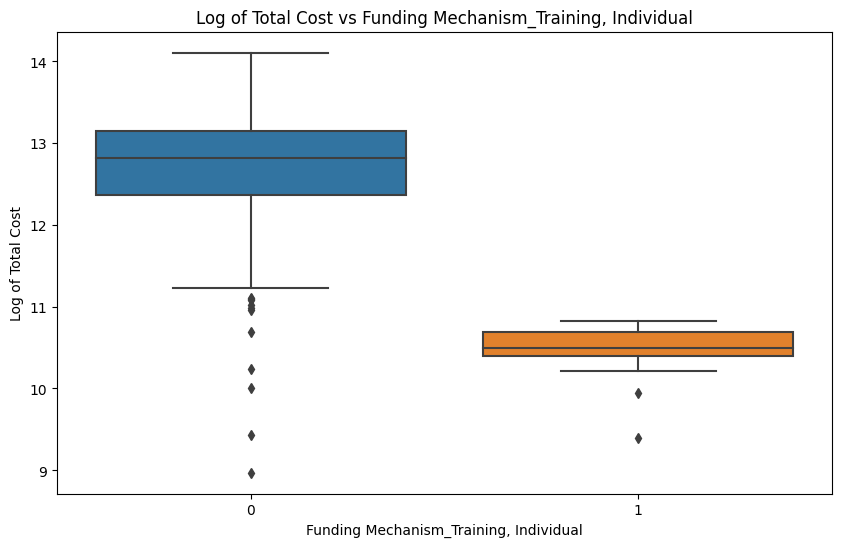

In [13]:
# Apply log transformation to the 'Total Cost'
df_top_features['Total Cost (Log)'] = df_top_features['Total Cost'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Generate the box plot with the transformed 'Total Cost'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Funding Mechanism_Training, Individual', y='Total Cost (Log)', data=df_top_features)
plt.title('Log of Total Cost vs Funding Mechanism_Training, Individual')
plt.xlabel('Funding Mechanism_Training, Individual')
plt.ylabel('Log of Total Cost')
plt.show()


##updated

C:\Users\shrey\AppData\Local\Temp\ipykernel_16080\843108350.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Fiscal Year', y='Total Cost', data=data, estimator='sum', ci=None)


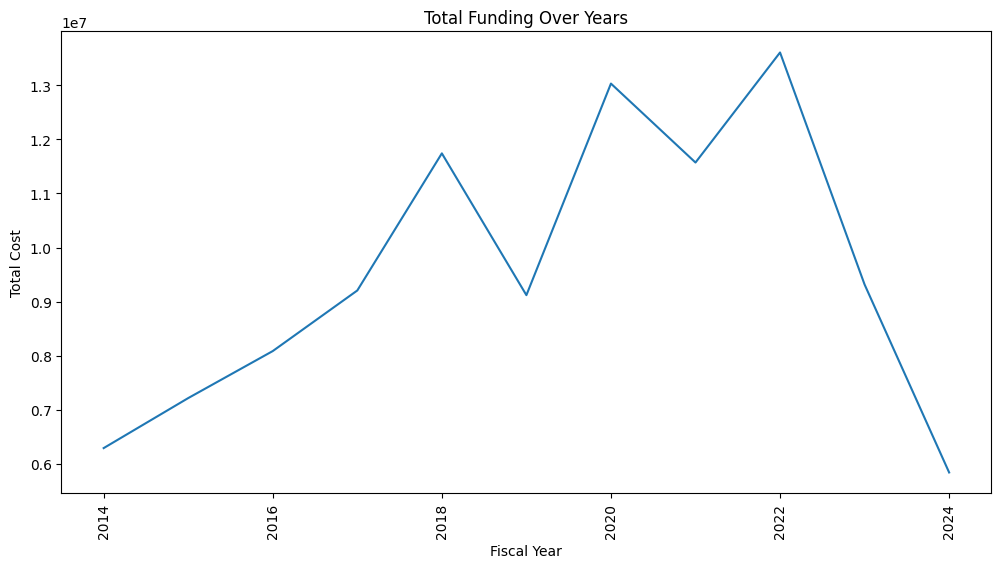

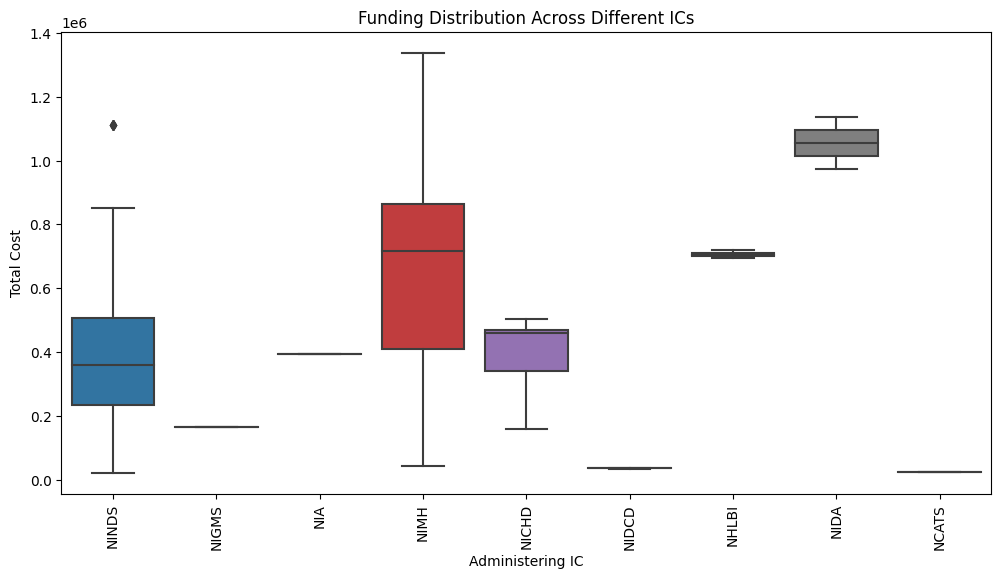

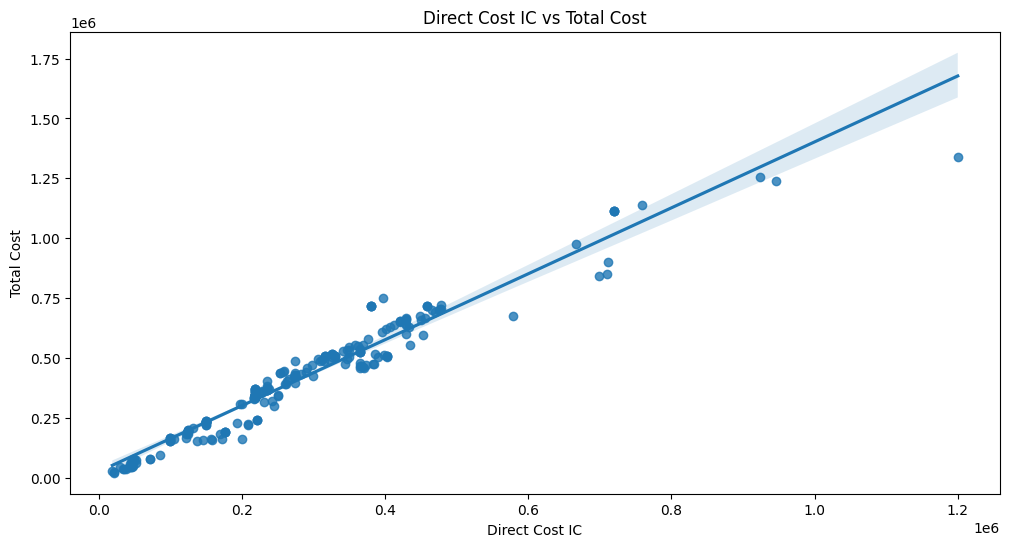

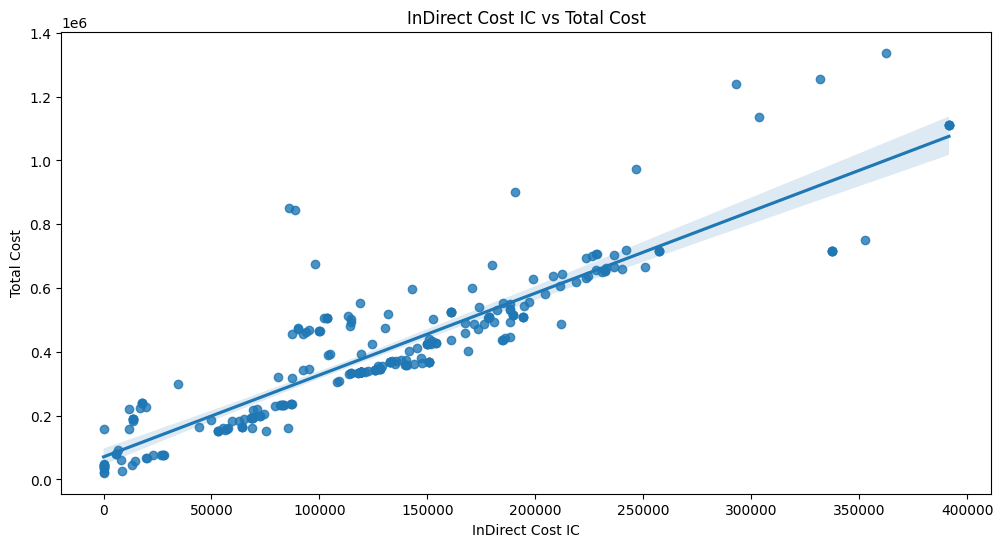

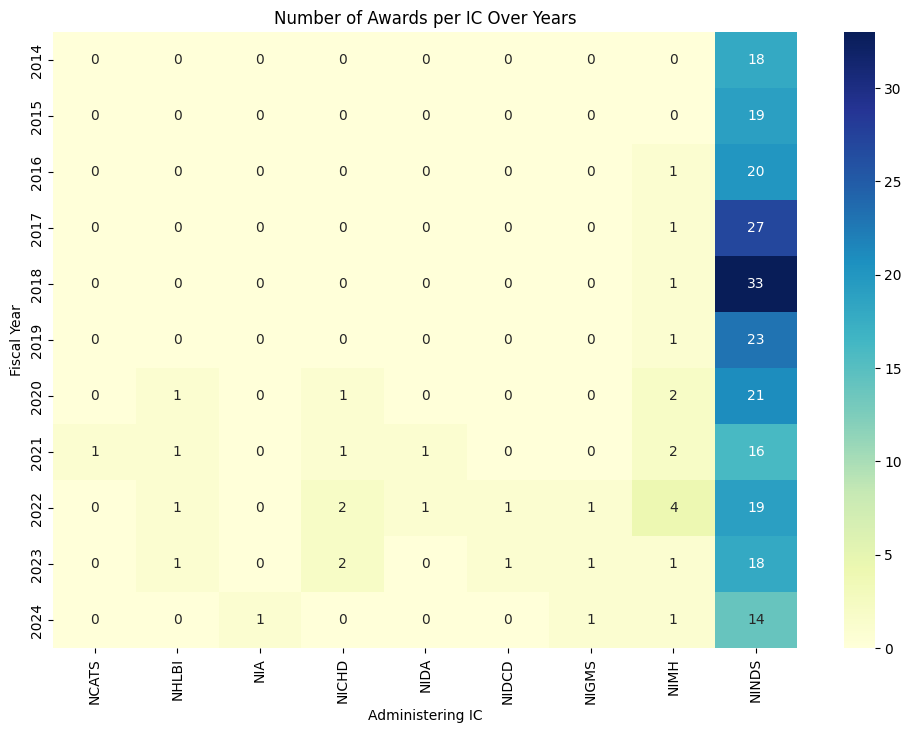

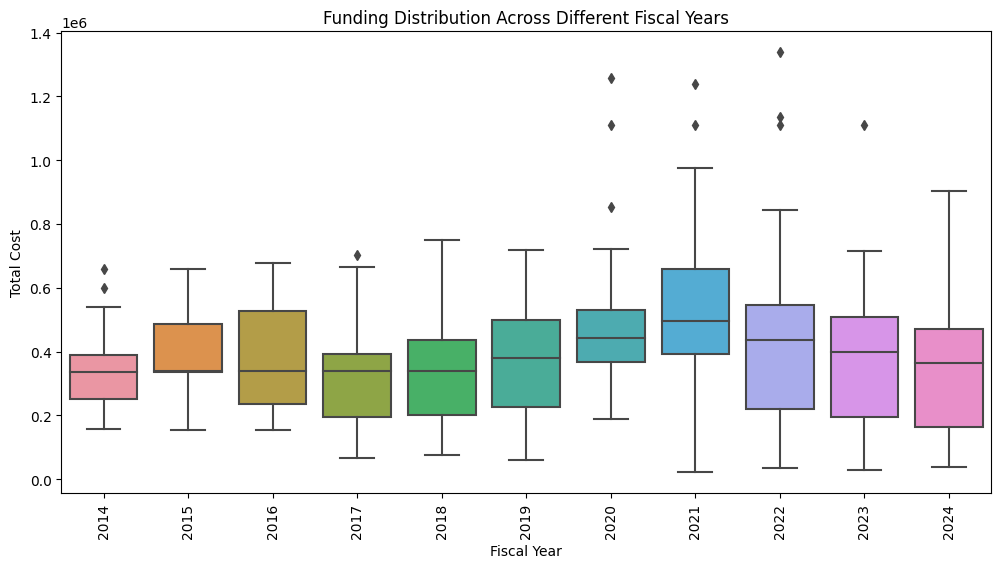

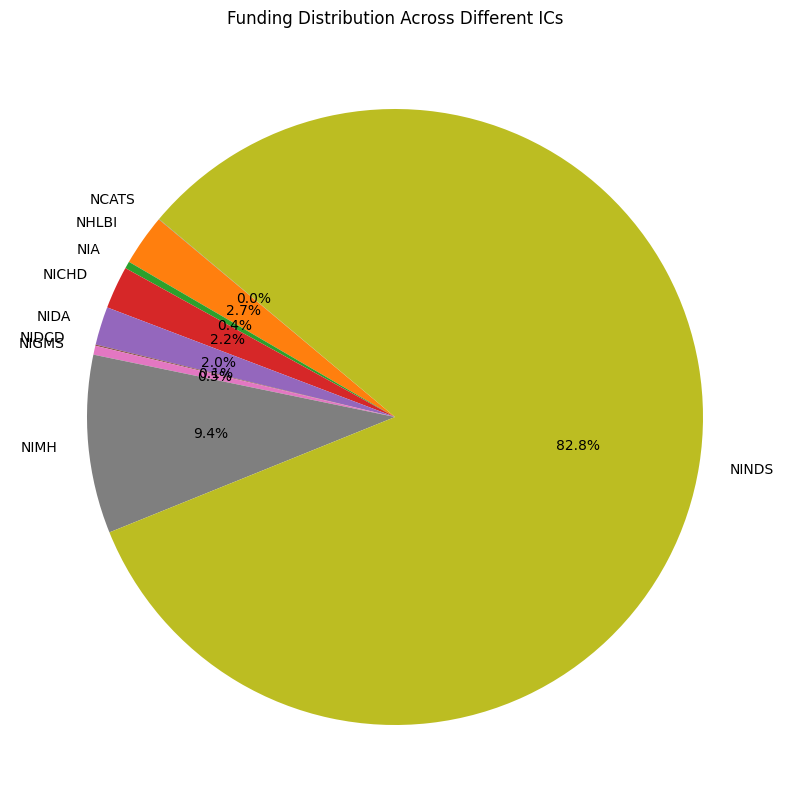

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the dataset is in a CSV file named 'nih_funding_data.csv'
data = pd.read_csv('NIH.csv')

# Convert relevant columns to numeric, forcing errors to NaN
data['Direct Cost IC'] = pd.to_numeric(data['Direct Cost IC'], errors='coerce')
data['InDirect Cost IC'] = pd.to_numeric(data['InDirect Cost IC'], errors='coerce')
data['Total Cost'] = pd.to_numeric(data['Total Cost'], errors='coerce')

# Drop rows with NaN values in key columns
data.dropna(subset=['Direct Cost IC', 'InDirect Cost IC', 'Total Cost'], inplace=True)

# Trend Analysis Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fiscal Year', y='Total Cost', data=data, estimator='sum', ci=None)
plt.title('Total Funding Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.show()

# IC-wise Funding Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Administering IC', y='Total Cost', data=data)
plt.title('Funding Distribution Across Different ICs')
plt.xlabel('Administering IC')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='Direct Cost IC', y='Total Cost', data=data)
plt.title('Direct Cost IC vs Total Cost')
plt.xlabel('Direct Cost IC')
plt.ylabel('Total Cost')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='InDirect Cost IC', y='Total Cost', data=data)
plt.title('InDirect Cost IC vs Total Cost')
plt.xlabel('InDirect Cost IC')
plt.ylabel('Total Cost')
plt.show()

# Heatmap for Award Counts
award_counts = data.pivot_table(index='Fiscal Year', columns='Administering IC', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(award_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Number of Awards per IC Over Years')
plt.xlabel('Administering IC')
plt.ylabel('Fiscal Year')
plt.xticks(rotation=90)
plt.show()

# Box Plots by Fiscal Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fiscal Year', y='Total Cost', data=data)
plt.title('Funding Distribution Across Different Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.show()

# Pie Charts for Funding Distribution
total_funding_by_ic = data.groupby('Administering IC')['Total Cost'].sum()
plt.figure(figsize=(10, 10))
total_funding_by_ic.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Funding Distribution Across Different ICs')
plt.ylabel('')
plt.show()
